# Companion Notebook
The `NSGA2Generator` can be run on multi-objective optimization problems purely from Xopt's YAML configuration files. This notebook demonstrates how to set up the configuration file, how to run the optimization algorithm, and how to load the data into python and plot the results. At the end, we demonstrate how to restart an optimization from one of `NSGA2Generator`'s checkpoint files.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import shutil

## Calling the Runner Script
We have prepared a python script and YAML configuration file in the example directory accompanying this notebook. The script simply loads the YAMl file into an Xopt object and calls `Xopt.run()` on it to perform the optimization until the termination condition is achieved.

In [2]:
# Run the optimizer (will take ~30s)
# We will run from the example directory containing `eval_fun.py` which is imported during our xopt run
! cd assets/yaml_runner_example && python run_xopt.py nsga2_zdt3.yml 

## Loading and Plotting Data
The YAML file specified that data will be output to the directory `nsga2_output` within the working directory of the script (ie `assets/yaml_runner_example`). In here, there will be several files.
- `populations.csv`: Each completed population is recorded to this file
- `data.csv`: Contains all evaluated inviduals
- `log.txt`: A record of all log messages the genreator emitted during its run
- `vocs.txt`: A copy of the variable, objectives, and constraints (VOCs) definitions
- `checkpoints/`: This directory contains checkpoint files which are used with the `checkpoint_file` key of the generator to restart an optimization.

In [3]:
# Load every generation
df = pd.read_csv("assets/yaml_runner_example/nsga2_output/populations.csv")
df.head()

x1       x10       x11       x12       x13       x14       x15  \
0  0.757171  0.027556  0.886762  0.997782  0.436263  0.647349  0.052450   
1  0.738306  0.657065  0.905782  0.047861  0.385231  0.706864  0.397985   
2  0.982129  0.957234  0.796108  0.835009  0.692714  0.819151  0.414045   
3  0.953245  0.077692  0.622076  0.374266  0.973179  0.125524  0.562233   
4  0.938032  0.402874  0.565311  0.236882  0.395835  0.928914  0.842025   

        x16       x17       x18  ...        x6        x7        x8        x9  \
0  0.800163  0.499384  0.850832  ...  0.918524  0.832002  0.686013  0.574809   
1  0.088233  0.920454  0.906025  ...  0.819612  0.421193  0.648690  0.936558   
2  0.706976  0.519018  0.699860  ...  0.517745  0.852694  0.686009  0.385145   
3  0.695636  0.906455  0.851431  ...  0.194350  0.928756  0.937321  0.153775   
4  0.629758  0.325104  0.897546  ...  0.133400  0.161884  0.186038  0.956905   

         f1        f2  xopt_generation  xopt_candidate_idx  xopt_runtime  \
0  0.757171  4.827782                1                  45      0.000693   
1  0.738306  4.722589                1                  11      0.000693   
2  0.982129  4.575185                1                  41      0.000693   
3  0.953245  4.340666                1                  43      0.000693   
4  0.938032  4.453311                1                  15      0.000693   

   xopt_error  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 36 columns]

In [4]:
# Grab just the final generation
last_gen = df[df["xopt_generation"] == df["xopt_generation"].max()]
last_gen.head()

x1       x10       x11       x12       x13       x14       x15  \
4950  0.037044  0.053427  0.008246  0.001219  0.008226  0.014463  0.002089   
4951  0.061889  0.058136  0.002628  0.008467  0.023875  0.002964  0.010475   
4952  0.833239  0.047941  0.008240  0.002556  0.053391  0.151561  0.011434   
4953  0.420315  0.012426  0.009275  0.015830  0.142781  0.002175  0.002006   
4954  0.253466  0.061309  0.008859  0.001893  0.008226  0.151081  0.030845   

           x16       x17       x18  ...        x6        x7        x8  \
4950  0.003024  0.016704  0.018367  ...  0.002494  0.000634  0.013365   
4951  0.013762  0.021939  0.018539  ...  0.000439  0.000980  0.005150   
4952  0.017577  0.023725  0.017167  ...  0.000446  0.001270  0.005603   
4953  0.003325  0.026681  0.037008  ...  0.000206  0.003126  0.003796   
4954  0.002712  0.009643  0.071078  ...  0.002644  0.001021  0.000433   

            x9        f1        f2  xopt_generation  xopt_candidate_idx  \
4950  0.002514  0.037044  0.906746              100                4932   
4951  0.003655  0.061889  0.820152              100                4961   
4952  0.001607  0.833239 -0.518190              100                4963   
4953  0.005197  0.420315  0.212698              100                4855   
4954  0.000464  0.253466  0.386831              100                4805   

      xopt_runtime  xopt_error  
4950      0.000622       False  
4951      0.000603       False  
4952      0.000603       False  
4953      0.000621       False  
4954      0.000600       False  

[5 rows x 36 columns]

Text(0.5, 1.0, 'Generation 100')

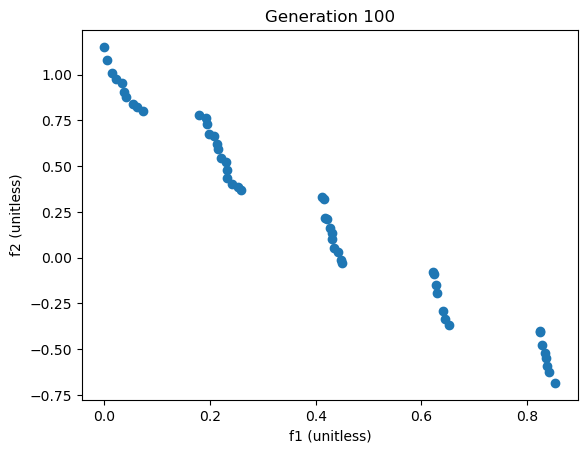

In [5]:
# Plot the objectives
plt.scatter(last_gen["f1"], last_gen["f2"])
plt.xlabel("f1 (unitless)")
plt.ylabel("f2 (unitless)")
plt.title(f"Generation {last_gen['xopt_generation'].max()}")

## Restoring from Checkpoints
In this section, we will restart the optimizer from one of its saved checkpoints. This allows us to carry on an optimization that was previously terminated with no loss of information. The checkpoint is specified in the YAML file using the key `checkpoint_file`. Any additional settings in the generator will override the settings included in the checkpoint. The evaluation function still needs to be defined and should be identical to what was used during the original run.

In [6]:
# Hack so you do not need to change the checkpoint filename in the config file manually for this tutorial
# In a real optimization, you will set `checkpoint_file` to the file of your choice
! cd assets/yaml_runner_example/nsga2_output/checkpoints &&  mv $(ls -1 | tail -n 1) 20250805_065102_1.txt

In [7]:
# Run the optimizer for another few generations (will take ~30s)
! cd assets/yaml_runner_example && python run_xopt.py nsga2_from_checkpoint.yml 

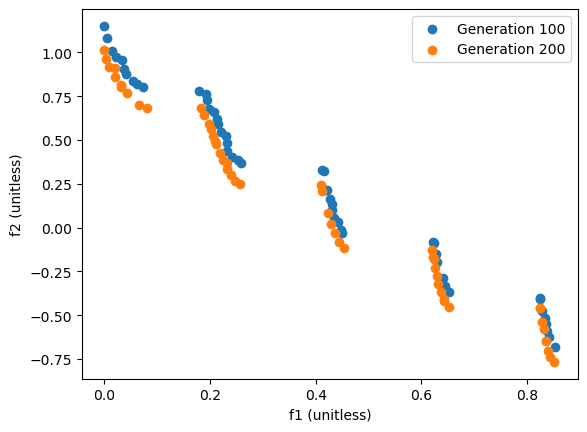

In [8]:
# Grab the last generation
df = pd.read_csv(
    "assets/yaml_runner_example/nsga2_from_checkpoint_output/populations.csv"
)
last_gen_restarted = df[df["xopt_generation"] == df["xopt_generation"].max()]

# Plot the objectives
plt.scatter(
    last_gen["f1"],
    last_gen["f2"],
    label=f"Generation {last_gen['xopt_generation'].max()}",
)
plt.scatter(
    last_gen_restarted["f1"],
    last_gen_restarted["f2"],
    label=f"Generation {last_gen_restarted['xopt_generation'].max()}",
)
plt.xlabel("f1 (unitless)")
plt.ylabel("f2 (unitless)")
plt.legend()

## Cleanup
We will now remove the files created in this notebook.

In [9]:
# Clean up the output directoris
shutil.rmtree("assets/yaml_runner_example/nsga2_output")
shutil.rmtree("assets/yaml_runner_example/nsga2_from_checkpoint_output")